In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# Check for GPU
import tensorflow as tf
print("GPU", " is available " if tf.config.list_physical_devices("GPU") else "not available ")
tf.compat.v1.reset_default_graph()

GPU not available 


In [5]:
image_name = []
image_label = []

for folder in os.listdir('Dataset/covid_ctscan/New_Data_CoV2'):
    data_folder = 'Dataset/covid_ctscan/New_Data_CoV2/' + folder
    for subfolder in os.listdir(data_folder):
        sub_folder = data_folder + '/' + subfolder
        for files in os.listdir(sub_folder):
            filename, fileextension = os.path.splitext(files)
            
            if(fileextension == '.png'):
                file_path = sub_folder + '/' + files
                image_name.append(file_path)
                image_label.append(folder)

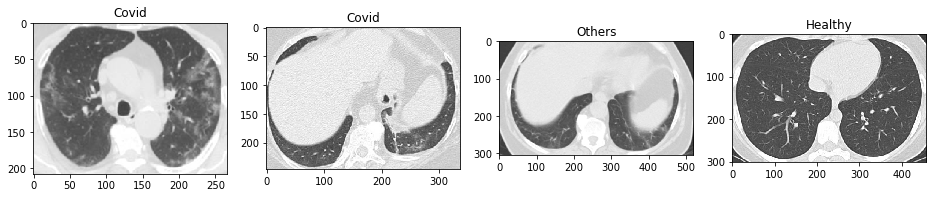

In [6]:
#Matplotlib image show
plt.figure(figsize=(16,16))
plt.subplot(141)
plt.imshow(cv2.imread(image_name[1000]))
plt.title(image_label[1000])

plt.subplot(142)
plt.imshow(cv2.imread(image_name[2000]))
plt.title(image_label[2000])

plt.subplot(143)
plt.imshow(cv2.imread(image_name[3000]))
plt.title(image_label[3000])

plt.subplot(144)
plt.imshow(cv2.imread(image_name[4000]))
plt.title(image_label[4000])
plt.show()

In [7]:
def process_image():
    #Return two array. One of resize images and other of array of labels
    x = []  # array of images
    y = []  # array of labels
    WIDTH = 32
    HEIGHT = 32
    for img, label in zip(image_name, image_label):
        #Read and resize image
        full_size_image = cv2.imread(img)
        #full_size_gray_image = cv2.cvtColor(full_size_image, cv2.COLOR_BGR2GRAY)
        x.append(cv2.resize(full_size_image,(WIDTH, HEIGHT), interpolation=cv2.INTER_CUBIC))
        # Labels
        # Here. 0 is for Covid, 1 is for Healthy and 2 is for Others.
        if(label=='Covid'):
            value = 0
            y.append(value)
        elif(label=='Healthy'):
            value = 1
            y.append(value)
        else:
            value = 2
            y.append(value)
        
        
        
    return x,y

In [8]:
x,y = process_image()

In [9]:
x = np.asarray(x)
y = np.asarray(y)
print('Shape of x: ',x.shape, '  Shape of y: ', y.shape)
print('Dimension of x: ', x.ndim, '  Dimension of y: ', y.ndim)

Shape of x:  (4171, 32, 32, 3)   Shape of y:  (4171,)
Dimension of x:  4   Dimension of y:  1


In [10]:
no_of_covid = 0
no_of_healthy = 0
no_of_others = 0

#As 0 is for Covid, 1 is for Healthy and 2 is for others
for i in y:
    if(i == 0):
        no_of_covid += 1
    elif(i == 1):
        no_of_healthy += 1
    else:
        no_of_others += 1
        
print("No of Covid CT Scan image:" , no_of_covid, " ,No of Healthy CT Scan image:", no_of_healthy,
      " ,No of Others CT Scan image:",no_of_others)

No of Covid CT Scan image: 2167  ,No of Healthy CT Scan image: 757  ,No of Others CT Scan image: 1247


In [11]:
#split dataset in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 42)
print('Shape of X_train: ',X_train.shape, '  Shape of y_train: ', y_train.shape)
print('Shape of X_test: ',X_test.shape, '  Shape of y_test: ', y_test.shape)

Shape of X_train:  (3545, 32, 32, 3)   Shape of y_train:  (3545,)
Shape of X_test:  (626, 32, 32, 3)   Shape of y_test:  (626,)


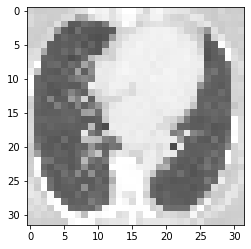

2


In [12]:
plt.imshow(X_train[0])
plt.show()
print(y_train[0])

In [13]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

Using TensorFlow backend.


In [14]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#CONSTANT
BATCH_SIZE = 8
NB_EPOCH = 10
NB_CLASSES = 3
VERBOSE = 1
VALIDATION_SPLIT = 0.15
OPTIM = RMSprop()  # Other optimizers are SGD, Adam, RMSprop, Adagrad

In [15]:
#convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(y_train[0],'  ',Y_train[0])
print(y_test[0],'  ',Y_test[0])
#now in Y_train and Y_test. First index is for Covid, second index is for Healthy and third index is for others.

#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

2    [0. 0. 1.]
0    [1. 0. 0.]


In [16]:
#model
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)              

In [17]:
#train
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,  metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH, validation_split = VALIDATION_SPLIT,
          verbose = VERBOSE)

score = model.evaluate(X_test, Y_test,batch_size = BATCH_SIZE,verbose = VERBOSE)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Train on 3013 samples, validate on 532 samples
Epoch 1/10
3013/3013 [==============================] - 23s 8ms/step - loss: 0.9794 - accuracy: 0.5370 - val_loss: 0.8555 - val_accuracy: 0.6109
Epoch 2/10
3013/3013 [==============================] - 20s 7ms/step - loss: 0.7965 - accuracy: 0.6372 - val_loss: 0.7906 - val_accuracy: 0.6372
Epoch 3/10
3013/3013 [==============================] - 19s 6ms/step - loss: 0.7555 - accuracy: 0.6648 - val_loss: 0.7678 - val_accuracy: 0.6579
Epoch 4/10
3013/3013 [==============================] - 20s 7ms/step - loss: 0.6959 - accuracy: 0.6983 - val_loss: 0.7823 - val_accuracy: 0.6861
Epoch 5/10
3013/3013 [==============================] - 21s 7ms/step - loss: 0.6705 - accuracy: 0.7202 - val_loss: 0.7311 - val_accuracy: 0.6861
Epoch 6/10
3013/3013 [==============================] - 23s 8ms/step - loss: 0.6409 - accuracy: 0.7351 - val_loss: 0.6923 - val_accuracy: 0.6936
Epoch 7/10
3013/3013 [==============================] - 22s 7ms/step - loss: 0.5975

Now, Validation accuracy is  0.7124 and Test Accuracy is 0.7492 .
Accuracy may increase if the no of epochs increases or another optimizer is used or BATCH_SIZE is changed.

Now predict the label of a CT Scan image. And plot prediction of a image in Bar Graph. 

In [18]:
predictions = model.predict(X_test)

In [19]:
print(predictions[0])

[0.6758868  0.12559077 0.19852242]


In [20]:
def label_prediction(input_image_array):
    reshaped_input_image_array = input_image_array.reshape(1,IMG_ROWS, IMG_COLS,IMG_CHANNELS)
    prediction = model.predict(reshaped_input_image_array)
    label_index = np.argmax(prediction)
    #First index is for Covid, second index is for Healthy and third index is for others.
    
    if(label_index == 0):
        label = 'Covid'
    elif(label_index == 1):
        label = 'Healthy'
    elif(label_index == 2):
        label == 'Others'
    
    return label

In [21]:
print(label_prediction(X_test[0]))

Covid


In [75]:
def plot_prediction(input_image_array):
    reshaped_input_image_array = input_image_array.reshape(1,IMG_ROWS, IMG_COLS,IMG_CHANNELS)
    prediction = model.predict(reshaped_input_image_array)
    label_names = ['Covid','Healthy','Others']
    fig = plt.figure(figsize = (10,5))
    plt.bar(label_names, prediction.reshape(3,), color='blue', width=0.5)
    plt.title('Prediction of the input image in bar graph\n',size=16)
    plt.ylabel('\nPrediction',size=12)
    plt.xlabel('\nTypes of CT Scan',size=12)
    
    plt.show()

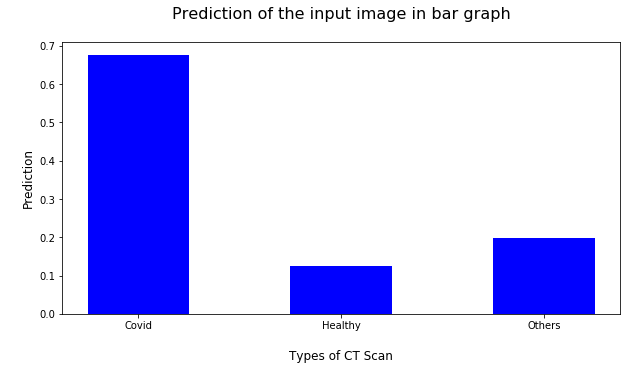

In [76]:
plot_prediction(X_test[0])